# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
url = "https://api.openweathermap.org/data/2.5/weather?&APPID="+ api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#print(https://api.openweathermap.org/data/2.5/weather?appid=169614e34427afdb73cdb18162b42982&q=port blair)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#for city in cities:
   # query_url+format(cities)
   # print("http://api.openweathermap.org?appid=169614e34427afdb73cdb18162b42982&q={}".format(city))

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
record = 1
for city in cities:
    try:
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        city_record=response["name"]
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        
        print(f"Processing Record {record} | {city_record}")
        record=record+1
    except:        
        print(f"City not found. Skipping")
    continue        

Processing Record 1 | Te Anau
Processing Record 2 | Punta Arenas
Processing Record 3 | Tucuman
Processing Record 4 | Cape Town
City not found. Skipping
Processing Record 5 | Beringovskiy
Processing Record 6 | Narsaq
Processing Record 7 | Hilo
Processing Record 8 | Slave Lake
Processing Record 9 | Boyolangu
Processing Record 10 | Puerto Ayora
Processing Record 11 | Taga
Processing Record 12 | Camabatela
Processing Record 13 | La Ronge
Processing Record 14 | Ushuaia
Processing Record 15 | Santa Cruz
Processing Record 16 | Ribeira Grande
Processing Record 17 | Rikitea
City not found. Skipping
Processing Record 18 | Mataura
Processing Record 19 | Guerrero Negro
Processing Record 20 | Elat
Processing Record 21 | Leh
Processing Record 22 | East London
Processing Record 23 | Lumby
Processing Record 24 | Dikson
Processing Record 25 | Chernyshevskiy
Processing Record 26 | Esperance
City not found. Skipping
Processing Record 27 | New Norfolk
City not found. Skipping
Processing Record 28 | Atuona

Processing Record 231 | Tshikapa
Processing Record 232 | Bafq
Processing Record 233 | Chapais
Processing Record 234 | Vila Velha
Processing Record 235 | Ponta do Sol
Processing Record 236 | George
City not found. Skipping
City not found. Skipping
Processing Record 237 | Ahipara
Processing Record 238 | Mayo
Processing Record 239 | Vanavara
Processing Record 240 | Thompson
Processing Record 241 | Dmitriyevskoye
Processing Record 242 | Itacoatiara
Processing Record 243 | Sines
Processing Record 244 | Severnoye
Processing Record 245 | Tezu
Processing Record 246 | Kununurra
Processing Record 247 | Byron Bay
Processing Record 248 | Naze
Processing Record 249 | Traverse City
Processing Record 250 | Victoria
Processing Record 251 | Natchez
Processing Record 252 | Upernavik
Processing Record 253 | Kalach-na-Donu
Processing Record 254 | Tiksi
Processing Record 255 | Hay River
City not found. Skipping
Processing Record 256 | Saint Anthony
Processing Record 257 | Dubbo
Processing Record 258 | Ball

Processing Record 456 | Bagli
Processing Record 457 | Tornio
Processing Record 458 | Katangli
City not found. Skipping
Processing Record 459 | Alpena
Processing Record 460 | Pathein
Processing Record 461 | Rio Cuarto
Processing Record 462 | Pingliang
City not found. Skipping
Processing Record 463 | San Rafael
City not found. Skipping
Processing Record 464 | Glendive
Processing Record 465 | Tupik
Processing Record 466 | Pijijiapan
Processing Record 467 | Saint-Joseph
Processing Record 468 | Honiara
City not found. Skipping
Processing Record 469 | Kamaishi
City not found. Skipping
Processing Record 470 | Tongliao
Processing Record 471 | Khandyga
Processing Record 472 | Vershino-Shakhtaminskiy
Processing Record 473 | Yangjiang
Processing Record 474 | Seminole
Processing Record 475 | La Palma
Processing Record 476 | Provideniya
Processing Record 477 | Okhotsk
Processing Record 478 | Belmonte
Processing Record 479 | Peace River
Processing Record 480 | Alihe
Processing Record 481 | Larkollen

In [6]:
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()


City          567
Cloudiness    567
Country       567
Date          567
Humidity      567
Lat           567
Lng           567
Max Temp      567
Wind Speed    567
dtype: int64

In [7]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
weather_data.to_csv("weather_output.csv", encoding="utf-8", index=False)

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Te Anau,30,NZ,1561564858,87,-45.41,167.72,279.097,1.28
1,Punta Arenas,0,CL,1561564779,80,-53.16,-70.91,273.150,6.70
2,Tucuman,0,PE,1561564859,13,-17.17,-70.89,292.397,2.37
3,Cape Town,0,ZA,1561564593,82,-33.93,18.42,288.710,4.60
4,Beringovskiy,100,RU,1561564860,97,63.05,179.32,279.197,4.85


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

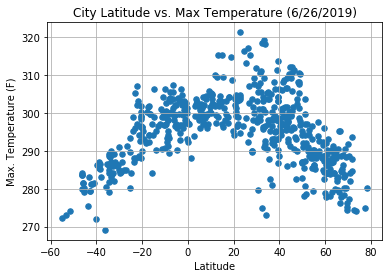

In [8]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=30)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (6/26/2019)")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

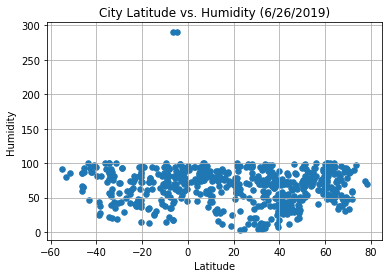

In [9]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=30)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (6/26/2019)")
plt.ylabel("Humidity ")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

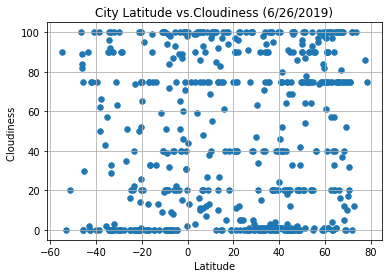

In [10]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=30)

# Incorporate the other graph properties
plt.title("City Latitude vs.Cloudiness (6/26/2019)")
plt.ylabel("Cloudiness ")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

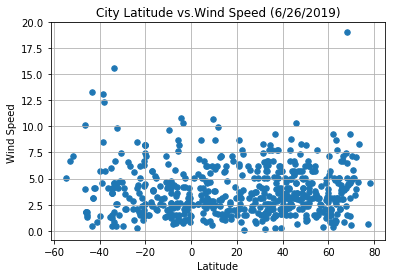

In [11]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=30)

# Incorporate the other graph properties
plt.title("City Latitude vs.Wind Speed (6/26/2019)")
plt.ylabel("Wind Speed ")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Wind Speed.png")

# Show plot
plt.show()

In [13]:
#ANALYSIS :
#1. Temperature increases as we go near the equator.
#2. There is not much of corelation of Cloudiness and Humidity with Latitude.
#3. Wind Speed increases at places far away from equator.
    